In [21]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
PATH = "dataset"
TRAIN_DATASET_PATH = f"{PATH}/train.csv"
TEST_DATASET_PATH = f"{PATH}/test.csv"

In [5]:
train_df = pd.read_csv(TRAIN_DATASET_PATH)
test_df = pd.read_csv(TRAIN_DATASET_PATH)

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   id         750000 non-null  int64 
 1   age        750000 non-null  int64 
 2   job        750000 non-null  object
 3   marital    750000 non-null  object
 4   education  750000 non-null  object
 5   default    750000 non-null  object
 6   balance    750000 non-null  int64 
 7   housing    750000 non-null  object
 8   loan       750000 non-null  object
 9   contact    750000 non-null  object
 10  day        750000 non-null  int64 
 11  month      750000 non-null  object
 12  duration   750000 non-null  int64 
 13  campaign   750000 non-null  int64 
 14  pdays      750000 non-null  int64 
 15  previous   750000 non-null  int64 
 16  poutcome   750000 non-null  object
 17  y          750000 non-null  int64 
dtypes: int64(9), object(9)
memory usage: 103.0+ MB


In [10]:
train_df.drop("id",axis=1,inplace=True)
train_df.duplicated().sum()

np.int64(0)

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'balance'}>,
        <Axes: title={'center': 'day'}>],
       [<Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'campaign'}>,
        <Axes: title={'center': 'pdays'}>],
       [<Axes: title={'center': 'previous'}>,
        <Axes: title={'center': 'y'}>, <Axes: >]], dtype=object)

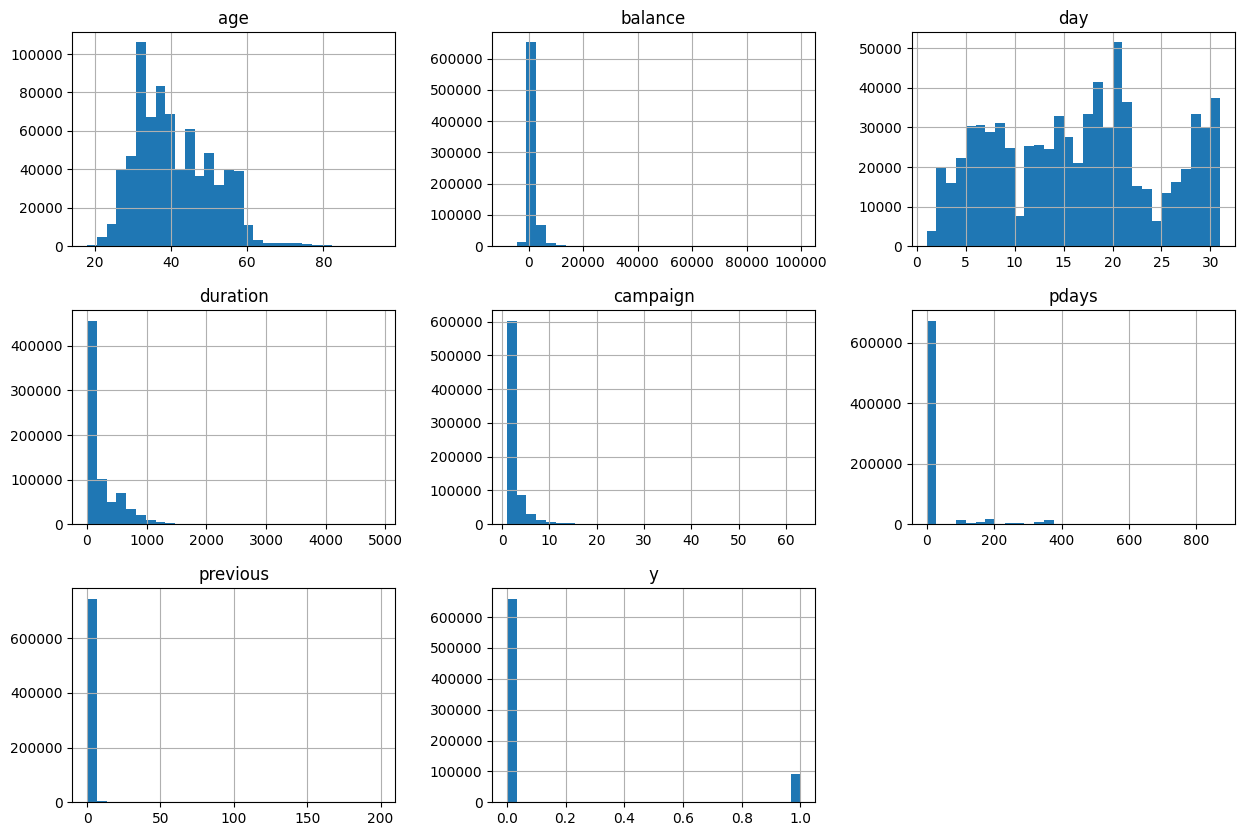

In [15]:
train_df.hist(bins=30,figsize=(15,10))

In [17]:
# Getting frequency for categorical columns to understand 
def get_categorical_frequencies(df):
    from collections import defaultdict
    cat_dict = defaultdict(list)

    columns = df.columns 
    for col in columns:
        if df[col].dtype == 'object':
            curr_dict = df[col].value_counts().to_dict()
            for k, v in curr_dict.items():
                cat_dict['category'].append(col)
                cat_dict['value'].append(k)
                cat_dict['frequency'].append(v)
    return pd.DataFrame(cat_dict)

cat_df = get_categorical_frequencies(train_df)

cat_df.head()

,category,value,frequency
0,job,management,175541
1,job,blue-collar,170498
2,job,technician,138107
3,job,admin.,81492
4,job,services,64209


/var/folders/cc/xvz0pw_n3dvg2s2hgjg4byk80000gn/T/ipykernel_29546/3690098090.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=curr_df, y='value', x='frequency', ax=ax, palette='Set3')
/var/folders/cc/xvz0pw_n3dvg2s2hgjg4byk80000gn/T/ipykernel_29546/3690098090.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=curr_df, y='value', x='frequency', ax=ax, palette='Set3')
/var/folders/cc/xvz0pw_n3dvg2s2hgjg4byk80000gn/T/ipykernel_29546/3690098090.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=curr_df, y='value', x='freque

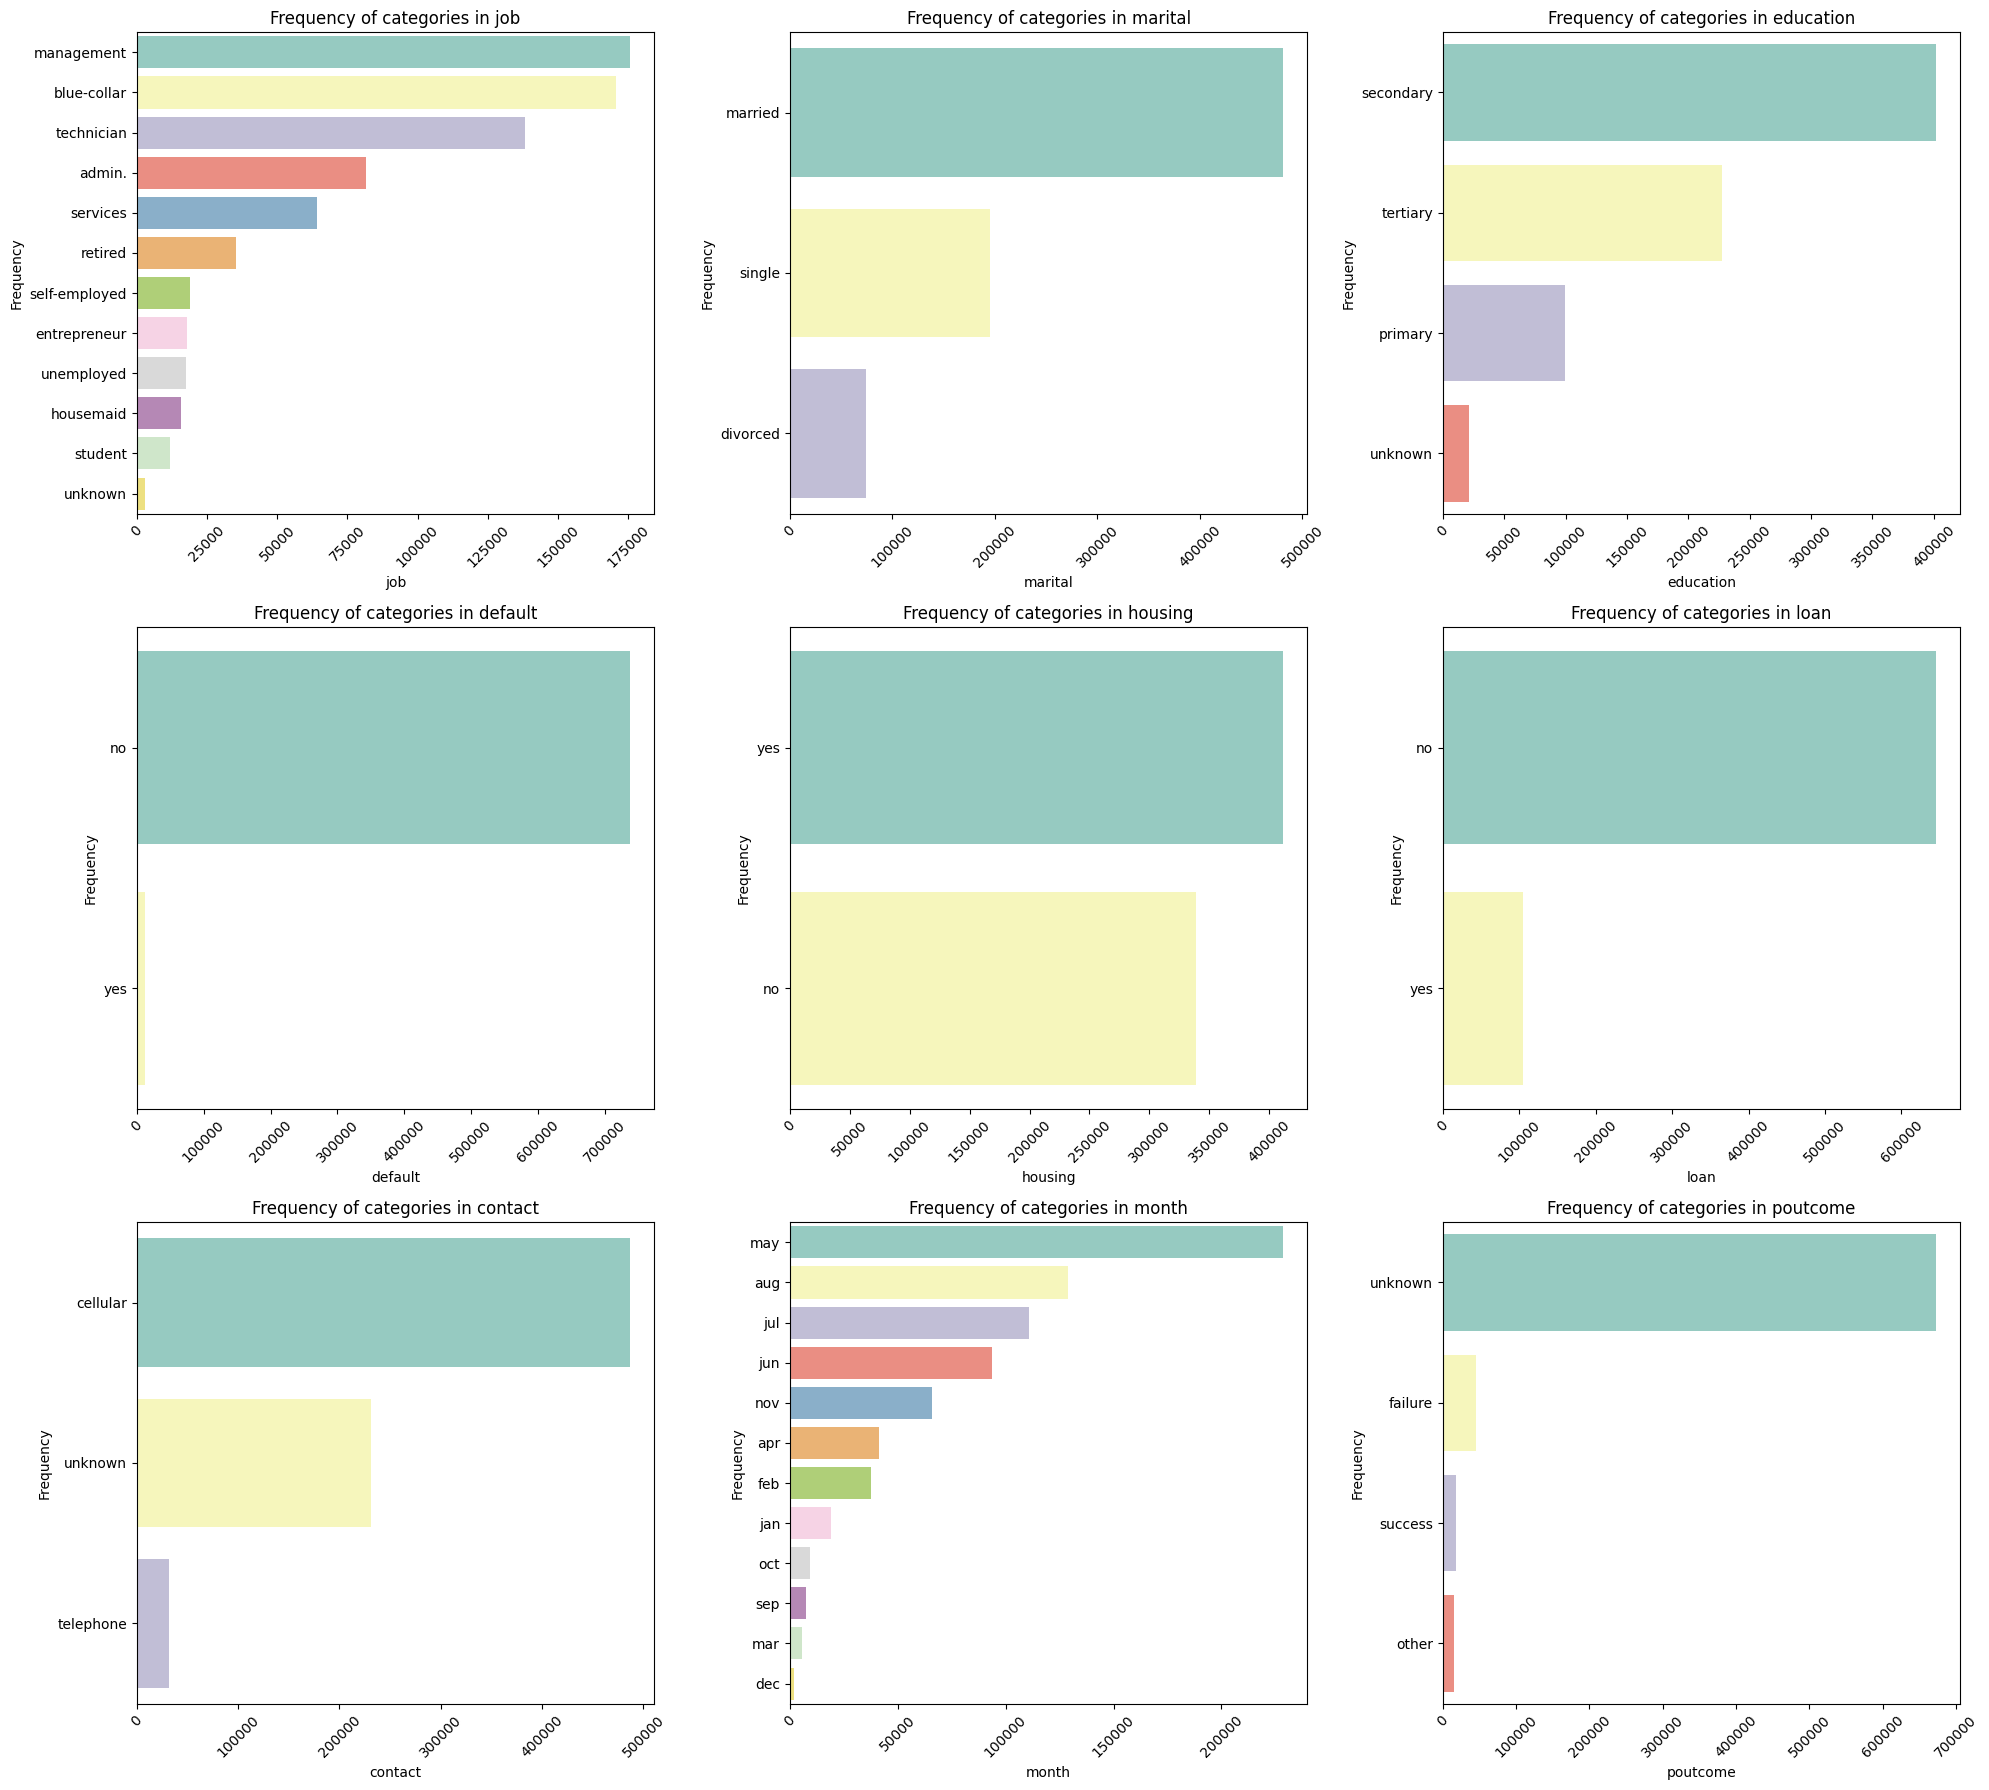

In [23]:
# Get only categorical columns
cat_columns = cat_df['category'].unique()
n_cols = len(cat_columns)

# Calculate grid dimensions
n_plot_cols = 3  # 3 columns in grid
n_plot_rows = (n_cols + n_plot_cols - 1) // n_plot_cols  # Ceiling division

# Create subplots - figsize needs to be a tuple (width, height)
fig, axes = plt.subplots(nrows=n_plot_rows, ncols=n_plot_cols, figsize=(20, 6*n_plot_rows))

# Flatten axes array for easier iteration
axes = axes.flatten()

for i, col in enumerate(cat_columns):
    ax = axes[i]
    curr_df = cat_df[cat_df['category'] == col]
    sns.barplot(data=curr_df, y='value', x='frequency', ax=ax, palette='Set3')
    ax.set_title(f'Frequency of categories in {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    
    # Optional: rotate x-labels if they're long
    ax.tick_params(axis='x', rotation=45)

# Hide empty subplots if n_cols isn't divisible by 3
for i in range(n_cols, len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

In [30]:
# Getting frequency for categorical columns to understand 
def get_categorical_frequencies(df):
    from collections import defaultdict
    cat_dict = defaultdict(list)

    columns = df.columns 
    for col in columns:
        if df[col].dtype == 'object':
            filtered_df = df[df['y'] == 1]
            curr_dict = filtered_df[col].value_counts().to_dict()
            for k, v in curr_dict.items():
                cat_dict['category'].append(col)
                cat_dict['value'].append(k)
                cat_dict['frequency'].append(v)
    return pd.DataFrame(cat_dict)

cat_df_y_1 = get_categorical_frequencies(train_df)

cat_df_y_1.head()

,category,value,frequency
0,job,management,26400
1,job,technician,16341
2,job,blue-collar,11498
3,job,admin.,9490
4,job,retired,8664


/var/folders/cc/xvz0pw_n3dvg2s2hgjg4byk80000gn/T/ipykernel_29546/3433917474.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=curr_df, y='value', x='frequency', ax=ax, palette='Set3')
/var/folders/cc/xvz0pw_n3dvg2s2hgjg4byk80000gn/T/ipykernel_29546/3433917474.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=curr_df, y='value', x='frequency', ax=ax, palette='Set3')
/var/folders/cc/xvz0pw_n3dvg2s2hgjg4byk80000gn/T/ipykernel_29546/3433917474.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=curr_df, y='value', x='freque

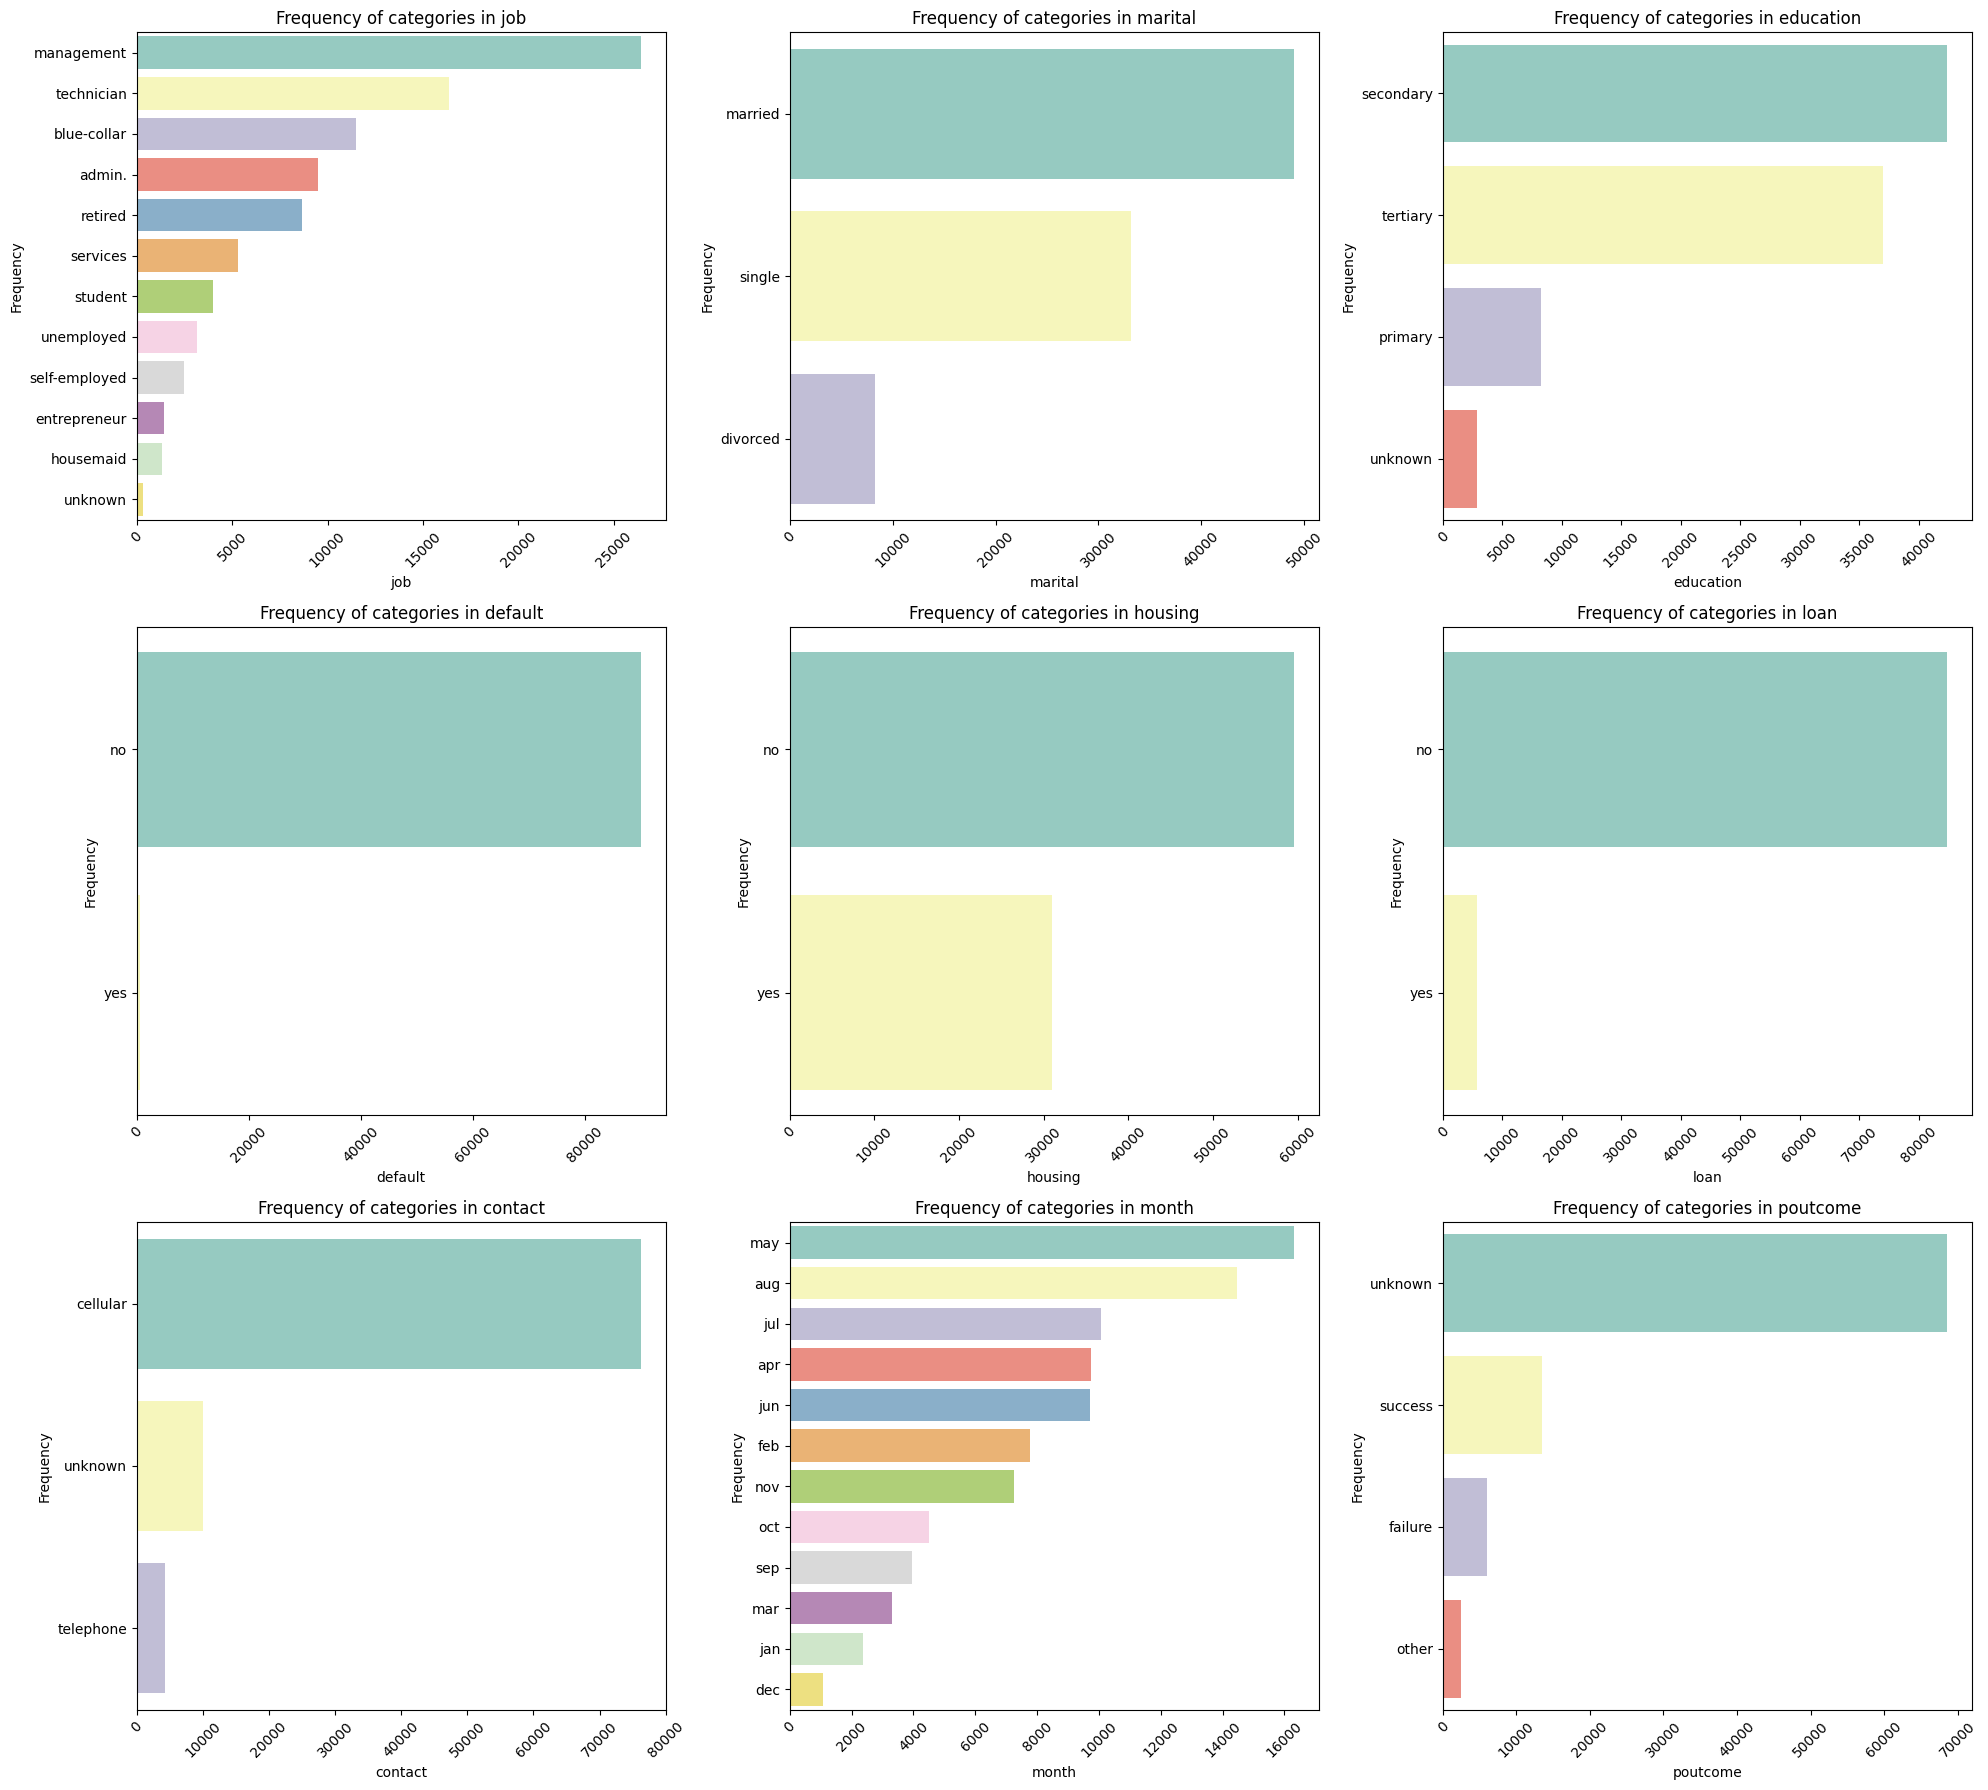

In [31]:
# Get only categorical columns
cat_columns = cat_df_y_1['category'].unique()
n_cols = len(cat_columns)

# Calculate grid dimensions
n_plot_cols = 3  # 3 columns in grid
n_plot_rows = (n_cols + n_plot_cols - 1) // n_plot_cols  # Ceiling division

# Create subplots - figsize needs to be a tuple (width, height)
fig, axes = plt.subplots(nrows=n_plot_rows, ncols=n_plot_cols, figsize=(20, 6*n_plot_rows))

# Flatten axes array for easier iteration
axes = axes.flatten()

for i, col in enumerate(cat_columns):
    ax = axes[i]
    curr_df = cat_df_y_1[cat_df_y_1['category'] == col]
    sns.barplot(data=curr_df, y='value', x='frequency', ax=ax, palette='Set3')
    ax.set_title(f'Frequency of categories in {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    
    # Optional: rotate x-labels if they're long
    ax.tick_params(axis='x', rotation=45)

# Hide empty subplots if n_cols isn't divisible by 3
for i in range(n_cols, len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

# Data Skew : Remove default, previous
# Add Features: Age range, quarter,